In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skl
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

from statsmodels.imputation import mice 

%matplotlib inline
sns.set(color_codes=True)#Set seaborn color coding

In [2]:
supermarket_till_df = pd.read_csv("supermarket_till_transactions.csv")
supermarket_till_df.sample(10)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
101,200607,20060412,4,13,1,17,PRD0903991,CL00049,DEP00012,G00004,...,LA,OA,994100100540326,S,LA,Small Shop,Fresh,STORE00159,SS,S03
3,200607,20060412,4,19,1,221,PRD0901647,CL00010,DEP00003,G00002,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02
83,200607,20060412,4,13,1,32,PRD0902540,CL00044,DEP00011,G00004,...,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
90,200607,20060412,4,15,1,76,PRD0900348,CL00065,DEP00019,G00007,...,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03
79,200607,20060412,4,13,1,368,PRD0901068,CL00058,DEP00016,G00006,...,NaN,NaN,994100100058515,L,UM,Top Up,Fresh,STORE00078,LS,S01
89,200607,20060412,4,15,1,103,PRD0900292,CL00108,DEP00037,G00010,...,NaN,NaN,994100100088144,L,LA,Top Up,Fresh,STORE00103,MS,N03
75,200607,20060411,3,13,1,24,PRD0901687,CL00204,DEP00068,G00022,...,MM,OT,994100100689262,M,UM,Top Up,Grocery,STORE00059,MS,W02
65,200607,20060412,4,20,1,41,PRD0901382,CL00128,DEP00046,G00013,...,NaN,NaN,994100100091691,M,MM,Small Shop,Fresh,STORE00025,XLS,S02
108,200607,20060411,3,10,1,13,PRD0900546,CL00197,DEP00067,G00021,...,UM,YA,994100100573192,M,LA,Small Shop,Nonfood,STORE00470,LS,S01
1,200607,20060412,4,19,1,28,PRD0900353,CL00070,DEP00020,G00007,...,LA,YF,994100100532897,M,MM,Small Shop,Fresh,STORE00001,LS,E02


Observe if basket size will determine the amount to be spend

In [67]:
basketSize_Spend_df = supermarket_till_df[["BASKET_SIZE","SPEND","CUST_LIFESTAGE","BASKET_DOMINANT_MISSION"]]
basketSize_Spend_df.sample(10)

,BASKET_SIZE,SPEND,CUST_LIFESTAGE,BASKET_DOMINANT_MISSION
89,L,103,NaN,Fresh
40,L,80,OT,Mixed
18,L,32,OT,Fresh
67,M,274,NaN,Fresh
50,L,125,NaN,Mixed
90,L,76,NaN,Fresh
35,L,326,OT,Mixed
64,M,72,NaN,Fresh
66,M,26,NaN,Fresh
59,L,294,NaN,Mixed


In [68]:
basketSize_Spend_df.nunique()

BASKET_SIZE                  3
SPEND                      101
CUST_LIFESTAGE               5
BASKET_DOMINANT_MISSION      4
dtype: int64

In [69]:
basketSize_Spend_df.BASKET_DOMINANT_MISSION.unique()

array(['Fresh', 'Mixed', 'Grocery', 'Nonfood'], dtype=object)

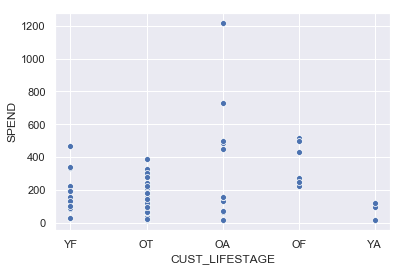

In [70]:
sns.scatterplot(x = "CUST_LIFESTAGE", y = "SPEND", data = basketSize_Spend_df)

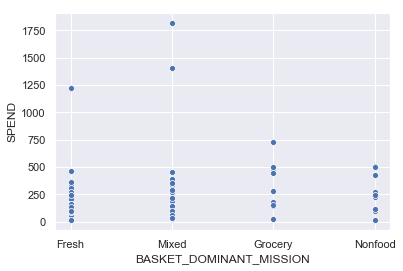

In [71]:
sns.scatterplot(x = "BASKET_DOMINANT_MISSION", y = "SPEND", data = basketSize_Spend_df)

In [72]:
basketSize_Spend_df.CUST_LIFESTAGE = basketSize_Spend_df.CUST_LIFESTAGE.fillna("OT")
basketSize_Spend_df.nunique()

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


BASKET_SIZE                  3
SPEND                      101
CUST_LIFESTAGE               5
BASKET_DOMINANT_MISSION      4
dtype: int64

In [73]:
basketSize_Spend_df.sample(10)

,BASKET_SIZE,SPEND,CUST_LIFESTAGE,BASKET_DOMINANT_MISSION
82,L,150,OT,Fresh
14,L,108,OT,Fresh
20,L,228,OT,Fresh
71,M,63,OA,Fresh
94,L,245,OT,Fresh
102,L,273,OF,Nonfood
96,L,101,OT,Fresh
70,M,46,OT,Fresh
76,M,145,OT,Grocery
67,M,274,OT,Fresh


In [74]:
basketSize_Spend_df.CUST_LIFESTAGE.unique()

array(['YF', 'OT', 'OA', 'OF', 'YA'], dtype=object)

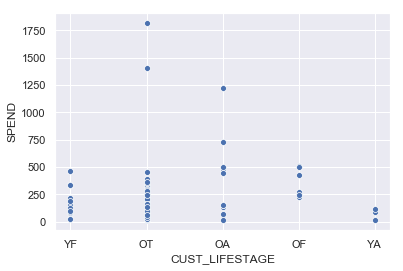

In [75]:
sns.scatterplot(x = "CUST_LIFESTAGE", y = "SPEND", data = basketSize_Spend_df)

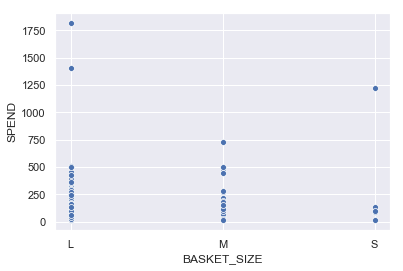

In [76]:
sns.scatterplot(x = "BASKET_SIZE", y = "SPEND", data = basketSize_Spend_df)

In [77]:
basketSize_Spend_df = pd.get_dummies(data=basketSize_Spend_df, columns=["BASKET_SIZE", "CUST_LIFESTAGE","BASKET_DOMINANT_MISSION"])
basketSize_Spend_df.sample(10)

,SPEND,BASKET_SIZE_L,BASKET_SIZE_M,BASKET_SIZE_S,CUST_LIFESTAGE_OA,CUST_LIFESTAGE_OF,CUST_LIFESTAGE_OT,CUST_LIFESTAGE_YA,CUST_LIFESTAGE_YF,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood
11,340,1,0,0,0,0,0,0,1,1,0,0,0
10,129,1,0,0,0,0,0,0,1,1,0,0,0
62,1219,0,0,1,1,0,0,0,0,1,0,0,0
9,465,0,1,0,0,0,0,0,1,1,0,0,0
105,223,1,0,0,0,1,0,0,0,0,0,0,1
36,135,1,0,0,0,0,1,0,0,0,0,1,0
106,247,1,0,0,0,1,0,0,0,0,0,0,1
98,61,1,0,0,0,0,1,0,0,1,0,0,0
74,279,0,1,0,0,0,1,0,0,0,1,0,0
82,150,1,0,0,0,0,1,0,0,1,0,0,0


In [78]:
basketSize_Spend_df.columns

Index(['SPEND', 'BASKET_SIZE_L', 'BASKET_SIZE_M', 'BASKET_SIZE_S',
       'CUST_LIFESTAGE_OA', 'CUST_LIFESTAGE_OF', 'CUST_LIFESTAGE_OT',
       'CUST_LIFESTAGE_YA', 'CUST_LIFESTAGE_YF',
       'BASKET_DOMINANT_MISSION_Fresh', 'BASKET_DOMINANT_MISSION_Grocery',
       'BASKET_DOMINANT_MISSION_Mixed', 'BASKET_DOMINANT_MISSION_Nonfood'],
      dtype='object')

In [79]:
x = basketSize_Spend_df[['BASKET_SIZE_L', 'BASKET_SIZE_M', 'BASKET_SIZE_S',
       'CUST_LIFESTAGE_OA', 'CUST_LIFESTAGE_OF', 'CUST_LIFESTAGE_OT',
       'CUST_LIFESTAGE_YA', 'CUST_LIFESTAGE_YF','BASKET_DOMINANT_MISSION_Fresh', 'BASKET_DOMINANT_MISSION_Grocery',
       'BASKET_DOMINANT_MISSION_Mixed', 'BASKET_DOMINANT_MISSION_Nonfood']]
y = basketSize_Spend_df.SPEND

x_train, x_test, y_train, y_test = skl.train_test_split(x, y, train_size = 0.70, random_state = 10)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(83, 12) (36, 12) (83,) (36,)


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Using stats_model to do a linear regression

In [80]:
stats_model = smf.ols('SPEND ~ BASKET_SIZE_L + BASKET_SIZE_M + BASKET_SIZE_S + CUST_LIFESTAGE_OA + CUST_LIFESTAGE_OF + CUST_LIFESTAGE_OT + CUST_LIFESTAGE_YA + CUST_LIFESTAGE_YF + BASKET_DOMINANT_MISSION_Fresh + BASKET_DOMINANT_MISSION_Grocery + BASKET_DOMINANT_MISSION_Mixed + BASKET_DOMINANT_MISSION_Nonfood', data=basketSize_Spend_df)
stats_model = stats_model.fit()

In [81]:
stats_model.params

Intercept                          156.394013
BASKET_SIZE_L                       73.924823
BASKET_SIZE_M                      -19.990442
BASKET_SIZE_S                      102.459632
CUST_LIFESTAGE_OA                  177.115358
CUST_LIFESTAGE_OF                   90.537178
CUST_LIFESTAGE_OT                  -34.002370
CUST_LIFESTAGE_YA                 -102.880890
CUST_LIFESTAGE_YF                   25.624736
BASKET_DOMINANT_MISSION_Fresh      -63.972755
BASKET_DOMINANT_MISSION_Grocery    107.755616
BASKET_DOMINANT_MISSION_Mixed       69.133833
BASKET_DOMINANT_MISSION_Nonfood     43.477319
dtype: float64

In [82]:
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SPEND   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.135
Date:                Sat, 25 Jan 2020   Prob (F-statistic):             0.0324
Time:                        15:49:03   Log-Likelihood:                -815.16
No. Observations:                 119   AIC:                             1650.
Df Residuals:                     109   BIC:                             1678.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         156.3940     29.169      5.362      0.000      98.582     214.207
BASKET_SIZE_L                      73.9248     51.582      1.433      0.155     -28.310     176.159
BASKET_SIZE_M                     -19.9904     51.854     -0.386      0.701    -122.763      82.782
BASKET_SIZE_S                     102.4596     87.458      1.172      0.244     -70.879     275.798
CUST_LIFESTAGE_OA                 177.1154    122.718      1.443      0.152     -66.107     420.338
CUST_LIFESTAGE_OF                  90.5372    215.639      0.420      0.675    -336.852     517.926
CUST_LIFESTAGE_OT                 -34.0024    120.611     -0.282      0.779    -273.049     205.044
CUST_LIFESTAGE_YA                -102.8809    164.924     -0.624      0.534    -429.755     223.993
CUST_LIFESTAGE_YF                  25.6247    122.098      0.210      0.834    -216.369     267.618
BASKET_DOMINANT_MISSION_Fresh     -63.9728     87.268     -0.733      0.465    -236.935     108.989
BASKET_DOMINANT_MISSION_Grocery   107.7556    105.210      1.024      0.308    -100.768     316.279
BASKET_DOMINANT_MISSION_Mixed      69.1338     94.008      0.735      0.464    -117.186     255.454
BASKET_DOMINANT_MISSION_Nonfood    43.4773    223.836      0.194      0.846    -400.159     487.113
==============================================================================
Omnibus:                      136.043   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2752.644
Skew:                           4.076   Prob(JB):                         0.00
Kurtosis:                      25.106   Cond. No.                     3.15e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.1e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
ypred = stats_model.predict(x_test)
stats_rmse = rmse(y_test, ypred)
stats_rmse

107.76688807020778

Using SKlearn Linear regression

In [84]:
lm = LinearRegression()
scikit_model = lm.fit(x_train,y_train)
scikit_model.coef_

array([  -2.67475066,  -87.22256945,   89.89732012,  139.84103365,
         66.74119192,  -67.79671068, -129.46098929,   -9.32452559,
        -91.30893026,   98.21733381,   55.81139382,  -62.71979737])

In [85]:
scikit_model.intercept_

292.40335611606247

In [86]:
scikit_ypred = scikit_model.predict(x_test)
sci_rmse = rmse(y_test, scikit_ypred)
sci_rmse

122.82511915248315